1 (0, 1) (0, 1)
2 (0, 1) (55, 8)
3 (0, 1) (72, 27)
4 (0, 1) (20, 8)
5 (0, 1) (69, 15)
6 (0, 1) (71, 65)
7 (0, 1) (4, 54)
8 (0, 1) (21, 31)
9 (0, 1) (60, 28)
10 (0, 1) (32, 43)
11 (0, 1) (47, 24)
12 (0, 1) (50, 32)
13 (0, 1) (48, 51)
14 (0, 1) (29, 57)
15 (0, 1) (42, 6)
16 (0, 1) (27, 1)
17 (0, 1) (46, 72)
18 (0, 1) (23, 0)
19 (0, 1) (46, 1)
20 (0, 1) (27, 72)
21 (0, 1) (42, 67)
22 (0, 1) (29, 16)
23 (0, 1) (48, 22)
24 (0, 1) (50, 41)
25 (0, 1) (47, 49)
26 (0, 1) (32, 30)
27 (0, 1) (60, 45)
28 (0, 1) (21, 42)
29 (0, 1) (4, 19)
30 (0, 1) (71, 8)
31 (0, 1) (69, 58)
32 (0, 1) (20, 65)
33 (0, 1) (72, 46)
34 (0, 1) (55, 65)
35 (0, 1) (0, 72)
36 (0, 1) (-1, -1)
37 (0, 1) (0, 1)
38 (0, 1) (55, 8)
39 (0, 1) (72, 27)
40 (0, 1) (20, 8)
41 (0, 1) (69, 15)
42 (0, 1) (71, 65)
43 (0, 1) (4, 54)
44 (0, 1) (21, 31)
45 (0, 1) (60, 28)
46 (0, 1) (32, 43)
47 (0, 1) (47, 24)
48 (0, 1) (50, 32)
49 (0, 1) (48, 51)
50 (0, 1) (29, 57)
51 (0, 1) (42, 6)
52 (0, 1) (27, 1)
53 (0, 1) (46, 72)
54 (0, 1) (23, 0)
55 

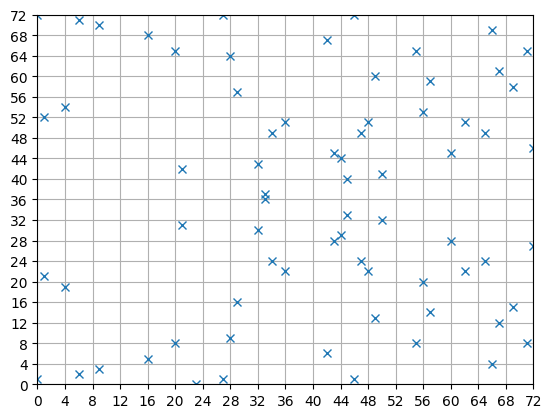

In [98]:
from matplotlib import pyplot as plt
import random

def pointsToXYArrays(points):
    return [p[0] for p in points], [p[1] for p in points]

class ElipticCurve:
    """
    Abstraçao de uma curva eliptica discreta, recebe a, b e módulo n
    """
    
    def __init__(self, a, b, n):
        self.a = a
        self.b = b
        self.n = n
        
        self._calculatePoints()

    def _calculatePoints(self):
        """
        Calcula os pontos da curva
        os pontos são sempre um touple (x, y) com x e y \in Z_n
        o caso especial de (-1, -1) representa o ponto no infinito
        """
        
        a, b, n = self.a, self.b, self.n
        eliptic = lambda x: x**3 + a*x + b
    
        x_ = range(n)
        y_ = range(n)
        
        self.points = [(x, y) for x in x_ for y in y_ if (y**2)%n == eliptic(x)%n] 

    def plotPoints(self):
        """Apenas para facilitar a visualização dos pontos, plota as curvas"""
        
        x, y = pointsToXYArrays(self.points)
        
        plt.plot(x, y, 'x')
        plt.xticks(range(0,self.n,(self.n+20)//20))
        plt.yticks(range(0,self.n,(self.n+20)//20))
        plt.xlim([0,self.n-1])
        plt.ylim([0,self.n-1])
        plt.grid()
        
    

    def doublePoint(self, p):
        """
        calcula P + P, caso especial da soma de dois pontos
        """
        
        if p[1] == 0: # retorna ponto no infinito, derivada é infinita
            return (-1, -1)
        
        lamb = (3*p[0]**2 + self.a) * pow(2*p[1], -1, self.n)
        
        x = (lamb**2 - 2*p[0]) % self.n
        y = (lamb*(p[0] - x) - p[1]) % self.n
        
        return (x, y)

    def sumPoints(self, p1, p2):
        """ 
        Soma dois pontos p1 e p2
        """
        if p1 == (-1, -1):
            return p2
        
        if p2 == (-1, -1):
            return p1
        
        if p1 == p2:
            return self.doublePoint(p1)
        
        x1, y1 = p1
        x2, y2 = p2
        
        if x1 == x2: # ponto no infinito
            return (-1, -1)
        
        lamb = (y2 - y1) % self.n
        lamb *= pow((x2 - x1), -1, self.n)
        
        x3 = (lamb**2 - x1 - x2) % self.n
        y3 = (lamb*(x1 - x3) - y1) % self.n
        
        return (x3, y3)
    
    def plot2PointsLine(self, p1, p2):
        """
        plota linha entre dois pontos 
        TODO implemmentar de forma mais geral
        """
        
        x1, y1 = p1
        x2, y2 = p2

        inclination = (y2 - y1) / (x2 - x1)
        intercept = y1 - (inclination * x1)
        
        lines = []
        value_sum = 0
        
        while True:
            
            line = lambda x: (inclination * (x - value_sum) + intercept)
            lineinv = lambda y: ((y - intercept) / inclination)
                
            lines.append(([x%self.n for x in range(self.n)], [line(x) for x in range(self.n)]))
                
            if value_sum > self.n:
                break
            
            print(value_sum, lineinv(self.n))
            
            value_sum += lineinv(self.n+intercept)
        
        for l in lines:
            plt.plot(*l)
            

    def multiplyPoints(self, p, k):
        
        if k == 1:
            return p
        
        return self.sumPoints(p, self.multiplyPoints(p, k-1))
    
A, B = 1, 1
N = 73

eliptic = ElipticCurve(A, B, N)



for p in eliptic.points:
    point = p
    
    for k in range(1, N):
        p3 = eliptic.multiplyPoints(point, k)

        print(k, point, p3)

eliptic.plotPoints()
# plt.plot(*pointsToXYArrays([point]), 'o')
# plt.plot(*pointsToXYArrays([p3]), 'o')

plt.show()
